In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [20]:
def generate_data(seed=42, n_samples=80, n_test_samples=20, noise=3):
    np.random.seed(seed)
    
    X = np.sort(5 * np.random.rand(n_samples, 1), axis=0)
    y = np.sin(X).ravel() + np.random.randn(n_samples) * noise
    
    X_test = np.sort(5 * np.random.rand(n_test_samples, 1), axis=0)
    y_test = np.sin(X_test).ravel() + np.random.randn(n_test_samples) * noise

    return X, y, X_test, y_test

def plot_polynomial_fit(X, y, degrees):
    X_range = np.linspace(0, 5, 100)[:, np.newaxis]
    plt.figure(figsize=(14, 5))
    
    for degree in degrees:
        polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
        linear_regression = LinearRegression()
        pipeline = make_pipeline(polynomial_features, linear_regression)
        pipeline.fit(X, y)
        y_pred_range = pipeline.predict(X_range)
        plt.plot(X_range, y_pred_range, label="Model degree {}".format(degree))
    
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Polynomial fit for different degrees")
    plt.show()

def plot_error_vs_degree(X, y, X_test, y_test, degrees):
    train_error = []
    test_error = []
    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(X, y)
        train_error.append(mean_squared_error(y, model.predict(X)))
        test_error.append(mean_squared_error(y_test, model.predict(X_test)))

    plt.figure(figsize=(8, 6))
    plt.plot(degrees, train_error, label='Train')
    plt.plot(degrees, test_error, label='Test')
    plt.yscale("log")
    plt.xlabel("Polynomial degree")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.title("Error vs. Polynomial degree")
    plt.show()

def plot_ridge_regularization(X, y, degrees, alphas=[0, 0.01, 1]):
    X_range = np.linspace(0, 5, 100)[:, np.newaxis]
    
    for alpha in alphas:
        plt.figure(figsize=(14, 5))
        for i, degree in enumerate(degrees):
            ax = plt.subplot(1, len(degrees), i + 1)
            plt.setp(ax, xticks=(), yticks=())
            
            model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
            model.fit(X, y)
            y_pred = model.predict(X_range)
            
            plt.plot(X_range, y_pred, label="Degree {}".format(degree))
            plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
            plt.title("Degree {}\nMSE = {:.2e}".format(degree, mean_squared_error(y, model.predict(X))))
            plt.legend(loc="best")
        
        plt.suptitle("Ridge Regularization with Alpha {}".format(alpha))
        plt.show()

def plot_lasso_regularization(X, y, degrees, alphas=[0, 0.01, 1]):
    X_range = np.linspace(0, 5, 100)[:, np.newaxis]
    
    for alpha in alphas:
        plt.figure(figsize=(14, 5))
        for i, degree in enumerate(degrees):
            ax = plt.subplot(1, len(degrees), i + 1)
            plt.setp(ax, xticks=(), yticks=())
            
            model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
            model.fit(X, y)
            y_pred = model.predict(X_range)
            
            plt.plot(X_range, y_pred, label="Degree {}".format(degree))
            plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
            plt.title("Degree {}\nMSE = {:.2e}".format(degree, mean_squared_error(y, model.predict(X))))
            plt.legend(loc="best")
        
        plt.suptitle("Ridge Regularization with Alpha {}".format(alpha))
        plt.show()

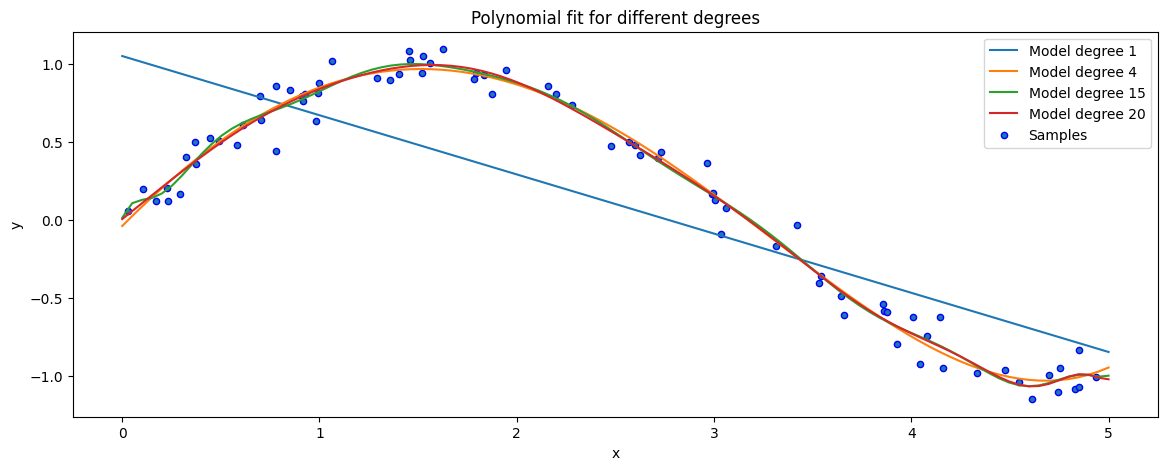

In [21]:
# Celda interactiva para jugar con los grados del polinomio

# Generamos los datos
noise = .1
X, y, X_test, y_test = generate_data(noise=noise)

# Prueba con un polinomio de grado n (puedes cambiar este valor y re-ejecutar la celda para ver los resultados)
degrees = [1, 4, 15, 20]
plot_polynomial_fit(X, y, degrees)


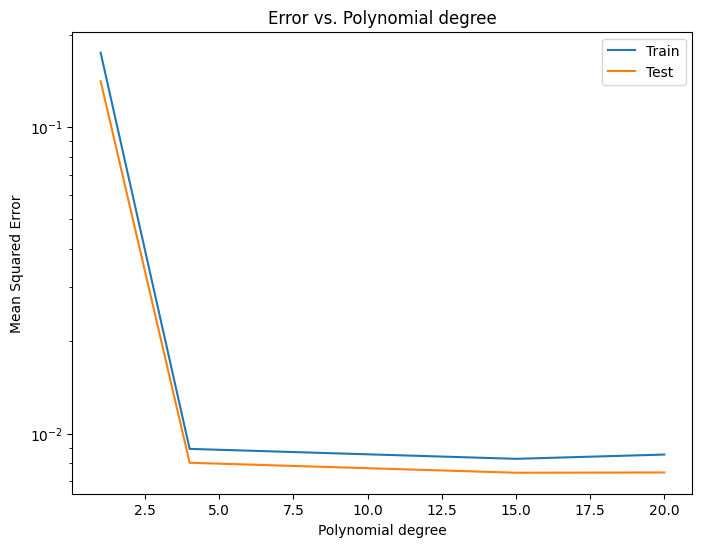

In [22]:
# Visualiza cómo cambia el error con respecto al grado del polinomio
plot_error_vs_degree(X, y, X_test, y_test, degrees)

/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


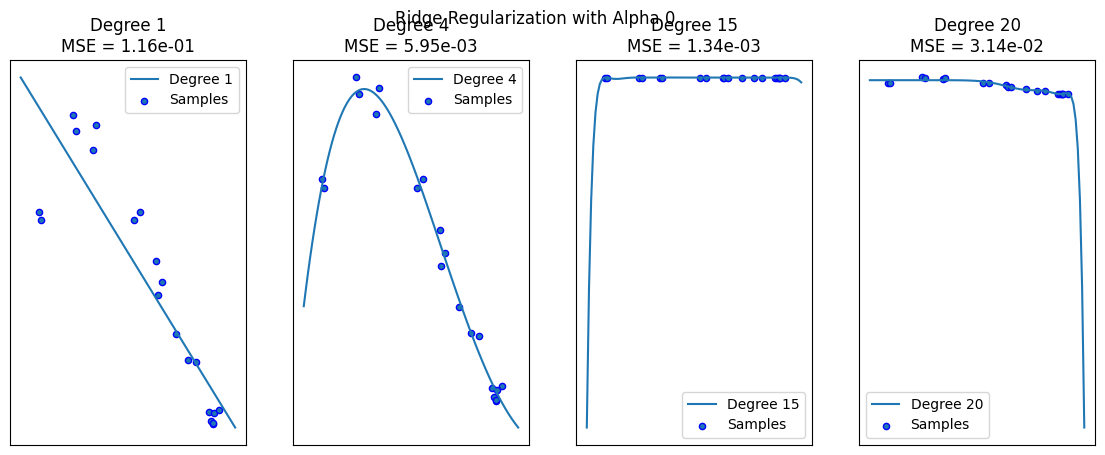

/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.7455e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


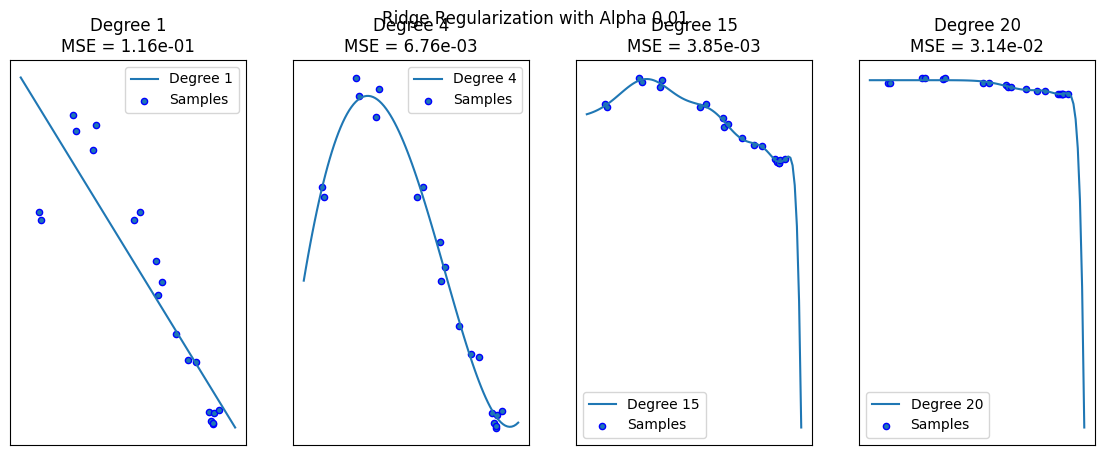

/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.65875e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


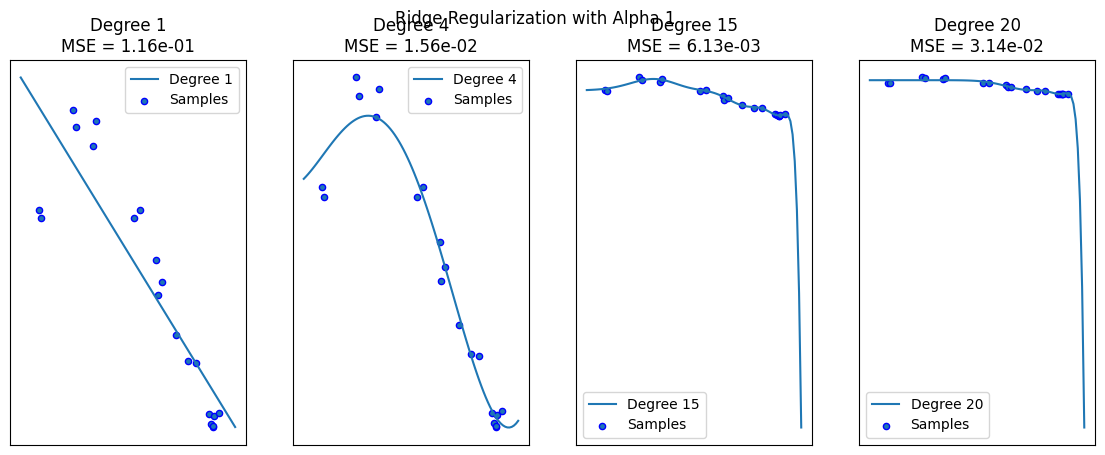

/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.87369e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/uumami/miniconda3/envs/itam/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


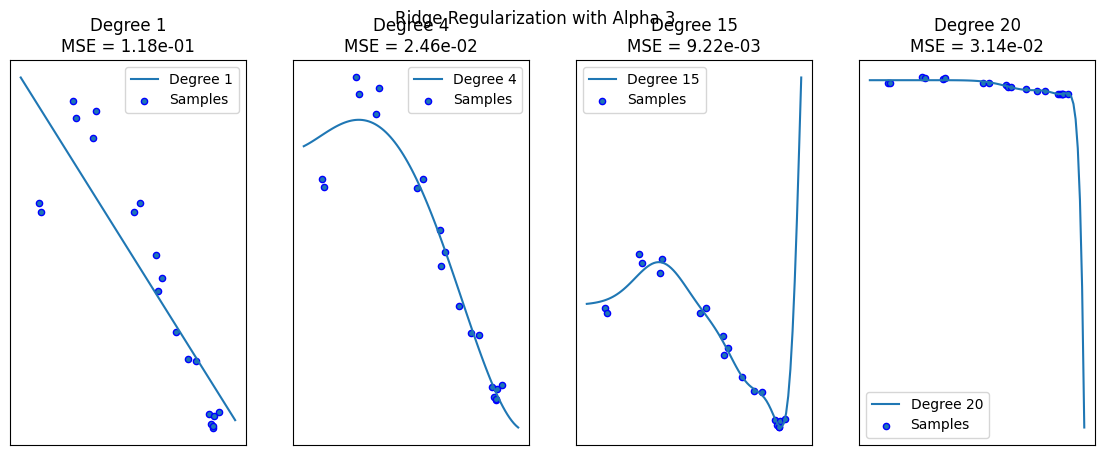

In [25]:
# Prueba la regularización Ridge con un polinomio de alto grado
plot_ridge_regularization(X_test, y_test, degrees, alphas=[0, 0.01, 1, 3])